In [7]:
pip install pykalman

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns; sns.set()
import statsmodels
import statsmodels.api as sm

from pykalman import KalmanFilter

In [57]:
x = np.random.normal(size=500) * 20
for i in range(500):
  x[i] += i * 1
x = pd.DataFrame(x)

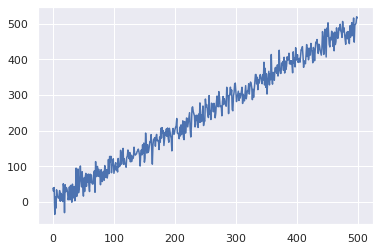

In [58]:
plt.plot(x)
plt.show()

In [59]:
obs_mat = sm.add_constant(x.values, prepend=False)[:, np.newaxis]
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)

# y is 1-dimensional, (alpha, beta) is 2-dimensional
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
                  initial_state_mean=np.zeros(2),
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=1.0,
                  transition_covariance=trans_cov)

In [61]:
state_means, state_covs = kf.filter(x)

# beta_kf.plot(subplots=True);

In [47]:
state_means[:,1]

array([1.18816223, 1.23590368, 1.26814306, 1.08641021, 0.92250093,
       1.01410605, 0.94689247, 0.97079068, 0.94352303, 0.93198322,
       0.98814016, 0.99720962, 0.98488475, 0.97935712, 0.96801569,
       0.98662585, 0.99382594, 0.98102691, 0.96614255, 0.95522538,
       0.95320302, 0.94328681, 0.94411881, 0.93703568, 0.93125451,
       0.93946127, 0.93366385, 0.92877846, 0.92524251, 0.92126068,
       0.92460488, 0.92145108, 0.91778341, 0.91495606, 0.91351078,
       0.9104927 , 0.91009179, 0.91454028, 0.91354959, 0.91550885,
       0.91286504, 0.92184528, 0.91918362, 0.91689441, 0.91657171,
       0.91770568, 0.91587278, 0.91415276, 0.91256705, 0.91116917,
       0.91199351, 0.91087172, 0.91124233, 0.90994341, 0.91292983,
       0.91184379, 0.91063048, 0.90943148, 0.90837232, 0.90775907,
       0.90698615, 0.90703185, 0.90729975, 0.90625393, 0.90526987,
       0.90543659, 0.90441169, 0.90362837, 0.90267459, 0.90179036,
       0.90121199, 0.90084129, 0.90147817, 0.90117323, 0.90174

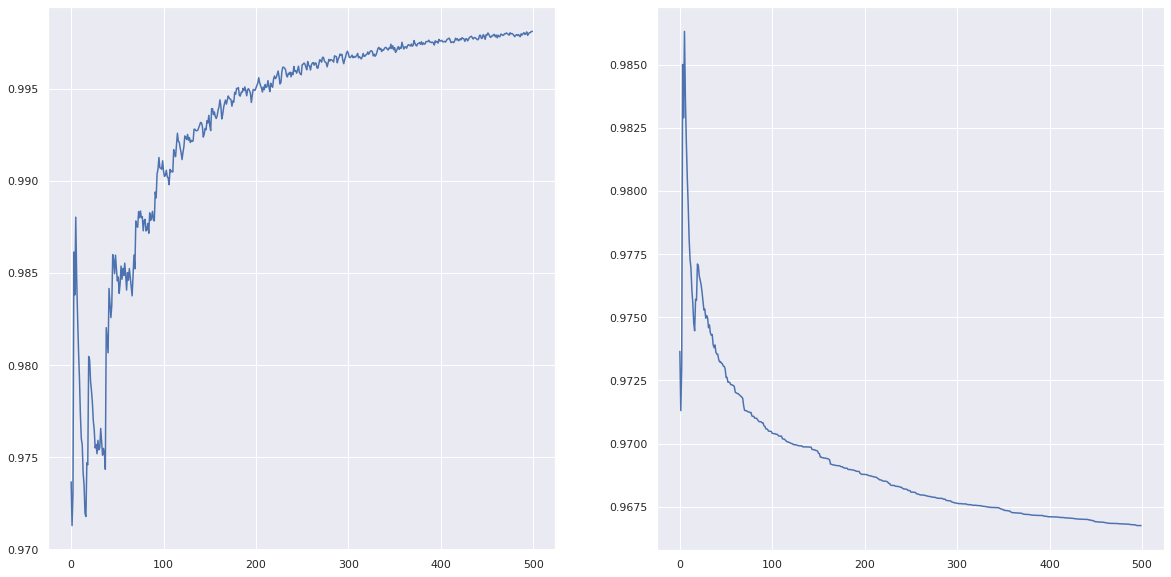

In [63]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(state_means[:,0])
plt.subplot(1, 2, 2)
plt.plot(state_means[:,1])

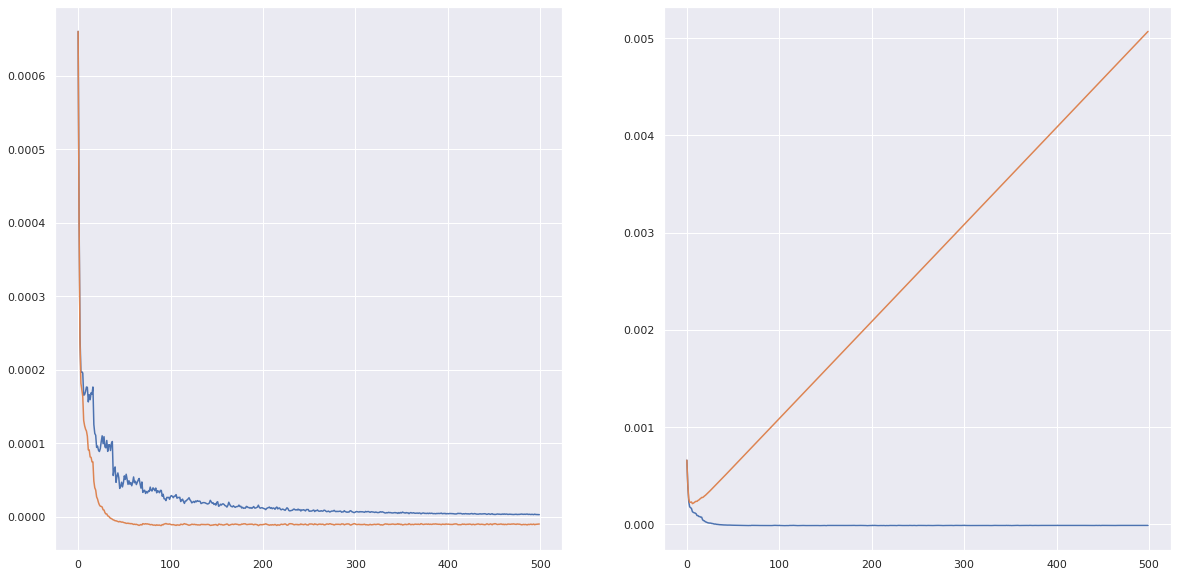

In [64]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(state_covs[:,0])
plt.subplot(1, 2, 2)
plt.plot(state_covs[:,1])